<a href="https://colab.research.google.com/github/rizzaesh/Data-Science-Tools/blob/main/data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# start with plot

In [16]:
x = np.linspace(0,10,500)
y = np.cumsum(np.random.randn(500,5),0)

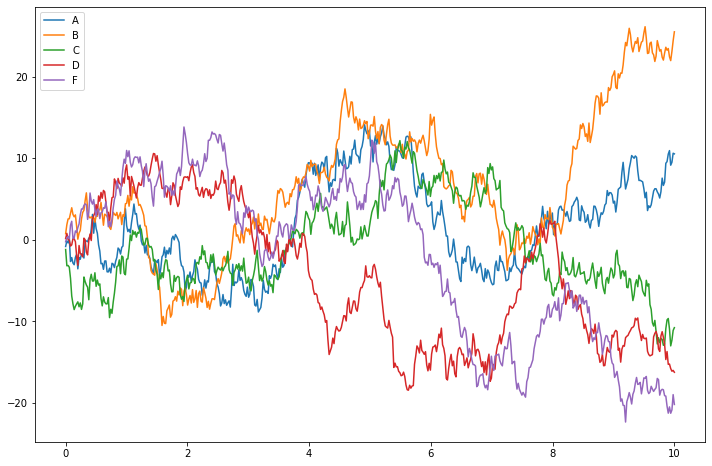

In [17]:
plt.figure(figsize = (12,8));
plt.plot(x,y);
plt.legend("ABCDF",ncol = 1, loc = 'upper left');

# get data 1

In [18]:
def get_historic(symbl, exchange = 'bitfinex', after = '2015-01-09'):
    url = f'http://api.cryptowat.ch/markets/{exchange}/{symbl}usd/ohlc'
    resp = requests.get(url,params={'periods':'86400','after':str(int(pd.Timestamp(after).timestamp()))})
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['86400'],columns = ['closetime','openprice','highpr','lowpr','closepr','volume','NA'])
    df['closetime'] = pd.to_datetime(df['closetime'],unit = 's')
    # df.set_index('closetime',inplace = True)
    return df

In [ ]:
# periods can be : 3600, 60, 86400 and ...

In [19]:
btc = get_historic('btc','bitstamp')

In [20]:
btc

,closetime,openprice,highpr,lowpr,closepr,volume,NA
0,2015-01-10,272.450000,305.000000,272.450000,293.970000,9914.249594,0.000000e+00
1,2015-01-11,293.970001,295.000000,271.029999,275.589996,29925.130859,0.000000e+00
2,2015-01-12,275.600006,280.940002,262.079987,266.339996,13659.593750,0.000000e+00
3,2015-01-13,266.339996,272.429993,263.540009,267.420013,10425.879883,0.000000e+00
4,2015-01-14,267.100006,268.149994,216.000000,227.000000,60079.964844,0.000000e+00
...,...,...,...,...,...,...,...
2593,2022-02-15,42078.530000,42871.680000,41575.000000,42540.300000,1270.886517,5.368421e+07
2594,2022-02-16,42567.270000,44785.660000,42469.960000,44582.480000,1772.923258,7.800057e+07
2595,2022-02-17,44590.750000,44590.750000,43312.830000,43901.480000,1251.833594,5.499960e+07
2596,2022-02-18,43901.490000,44204.780000,40088.880000,40556.110000,2437.490361,1.026582e+08


# get data 2

In [51]:
url = 'https://api.cryptowat.ch/markets/bitstamp/btcusd/ohlc'
resp = requests.get(url,params={'periods':'86400'})
resp.raise_for_status()
data = resp.json()

In [ ]:
data

In [52]:
# in below section you can transform a json file in a data frame.(actully the json is an data frame like csv, excel and ...)
df = pd.DataFrame(data['result']['86400'],columns = ['closetime','openprice','highpr','lowpr','closepr','volume','NA'])
df['closetime'] = pd.to_datetime(df['closetime'],unit = 's') # this line will changes Time like data to actual Time data
df.set_index('closetime',inplace = True) # this line will changes the index

In [ ]:
df

In [53]:
btc = df

In [54]:
btc = btc.tail(1647) # to give tha last 1646 sample from dataset

In [39]:
eth = df #another time to give the eth data, please change the btc to eth in URL section

In [30]:
btc.to_csv("data.")

# static plot

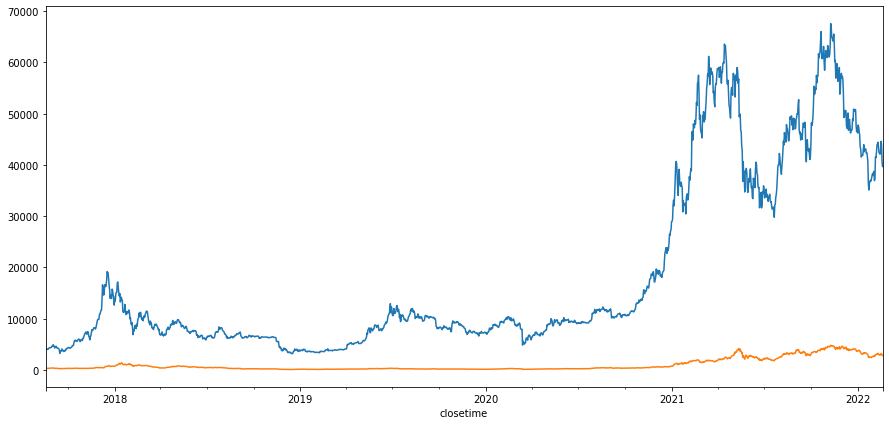

In [45]:
btc['closepr'].plot(figsize = (15,7));
eth['closepr'].plot(figsize = (15,7));

# dynamic plot

In [62]:
from bokeh.plotting import figure,output_file, show
from bokeh.io import output_notebook

In [63]:
output_notebook()

In [68]:
market = np.array([btc['closepr'],eth['closepr']])
pl = figure(x_axis_type = "datetime", title = "crypto",width = 800)
pl.grid.grid_line_alpha = 0.3
pl.xaxis.axis_label = 'date'
pl.yaxis.axis_label = "price"
pl.line(eth.index,market[0].T,color = '#f2a900',legend_label = "bit")
pl.line(eth.index,market[1].T,color = '#599990',legend_label = "eth")
pl.legend.location = "top_left"
show(pl)

# exporting not exporting

In [69]:
writer = pd.ExcelWriter("crypto.xlsx")

In [70]:
btc.to_excel(writer, sheet_name = "BitCoin")
eth.to_excel(writer, sheet_name = "Etherium")

In [71]:
writer.save()

# intro to numpy

In [72]:
import sys
import numpy as np

In [73]:
a = np.array([[1,2,3,4],[4,3,2,1]])

In [75]:
b = np.array([4,4,5,6])

In [79]:
c = np.array([a,b]) # this is wrong, find out why!?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [80]:
c.shape

(2,)

In [83]:
a[0,0:2]

array([1, 2])

In [84]:
b[[0,1]]

array([4, 4])

In [85]:
a[[0]]

array([[1, 2, 3, 4]])

In [86]:
# better performance with low int data
a = np.array([1,2,3,10000],dtype = np.int16)
a

array([    1,     2,     3, 10000], dtype=int16)

In [87]:
c = np.array([[1,2,3],[4,5,6],[7,8,9]])
c

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [88]:
c[1,0:2]

array([4, 5])

In [91]:
c[:,1:3]

array([[2, 3],
       [5, 6],
       [8, 9]])

In [92]:
c[2:,:1]

array([[7]])

In [93]:
c.var(axis = 1)

array([0.66666667, 0.66666667, 0.66666667])

In [94]:
b

array([4, 4, 5, 6])

In [95]:
b.var()

0.6875

In [99]:
b.std()

0.82915619758885

# vectorization

In [ ]:
b

array([4, 4, 5, 6])

In [102]:
b = np.arange(4)
b * 10

array([ 0, 10, 20, 30])

In [101]:
[b[i]*10 for i in b]

[0, 10, 20, 30]

In [ ]:
b*10

array([ 0, 10, 20, 30])

In [103]:
b+a

array([    1,     3,     5, 10003])

# boolian

In [129]:
b = np.array([9,7,4,2])

In [130]:
b[[True,False,False,False]]

array([9])

In [131]:
br = b>=2
br

array([ True,  True,  True,  True])

In [135]:
for i in b:
    if i==1:
        print(np.where(b==9))

In [141]:
arr = np.array([11, 12, 13, 14, 15, 16, 17, 15, 11, 12, 14, 15, 16, 17])

In [144]:
# result back the Where the data belongs
result = np.where(arr == 15)
print('Tuple of arrays returned : ', result)
print("Elements with value 15 exists at following indices", result[0], sep='\n')

Tuple of arrays returned :  (array([ 4,  7, 11]),)
Elements with value 15 exists at following indices
[ 4  7 11]


In [146]:
arr[result[0]]

array([15, 15, 15])

In [111]:
b[br]

array([2, 3])

In [112]:
b[b>=3]

array([3])

In [150]:
arr[(arr==15) | (arr==17)]

array([15, 17, 15, 15, 17])

In [152]:
np.where((arr==15) | (arr==17))

(array([ 4,  6,  7, 11, 13]),)

# linear Algebra

In [155]:
a.dot(b)

20035

In [160]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[43,23,42],[3,2,6],[12,543,56]])

In [163]:
A @ B

array([[  85, 1656,  222],
       [ 259, 3360,  534],
       [ 433, 5064,  846]])

In [166]:
A.dot(B.T).argmax()

8

# sizes

In [168]:
sys.getsizeof(1)

28

In [211]:
%time u = [i for i in range(1000)]

CPU times: user 75 µs, sys: 19 µs, total: 94 µs
Wall time: 98.7 µs


In [209]:
%time y = np.arange(1000)

CPU times: user 24 µs, sys: 7 µs, total: 31 µs
Wall time: 36.5 µs


In [212]:
%time sum([x**2 for x in u])

CPU times: user 407 µs, sys: 80 µs, total: 487 µs
Wall time: 492 µs


332833500

In [219]:
%time np.sum(y**2)

CPU times: user 1.07 ms, sys: 9 µs, total: 1.08 ms
Wall time: 5.61 ms


340.6611380857259

# Numpy Functions

In [221]:
np.random.random(10)

array([0.35785775, 0.0361618 , 0.4474786 , 0.24039097, 0.49837963,
       0.92548911, 0.46668323, 0.908727  , 0.33618847, 0.76327121])

In [226]:
np.random.normal(10)

9.722552809795761

In [281]:
np.random.rand(4)

array([0.33008218, 0.20265338, 0.61054345, 0.26695211])

In [233]:
np.random.rand(2,4)

array([[0.61247111, 0.19797615, 0.77455888, 0.3531846 ],
       [0.19714937, 0.97004512, 0.83758326, 0.9648943 ]])

In [234]:
np.random.randn(2,4)

array([[ 0.29856995, -0.66062433, -0.59224712,  0.77650569],
       [ 0.69847283, -1.78440056,  1.55084201, -0.39601952]])

In [235]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [236]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [240]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [243]:
a = np.arange(10)

In [244]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [248]:
a.reshape(5,2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [249]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [257]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [258]:
np.linspace(0,1,5,False)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [259]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [261]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [265]:
np.zeros((3,3),dtype=np.int8)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [266]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [267]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [268]:
np.empty(5)

array([1., 1., 1., 1., 1.])

In [269]:
np.empty((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [270]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [271]:
np.eye(3,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [272]:
np.eye(6,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [276]:
np.eye(3,7, k = 2) # k will say that where the one will started

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

# Pandas

In [278]:
import pandas as np
import numpy as np

In [288]:
gdat = pd.Series(np.random.rand(10)*1000)

In [289]:
gdat

0    543.048828
1     92.830317
2    321.506513
3    896.047484
4    457.286641
5    934.314608
6    949.329520
7    737.631313
8    562.425875
9    293.356693
dtype: float64

In [290]:
gdat.name = 'random number'

In [291]:
gdat

0    543.048828
1     92.830317
2    321.506513
3    896.047484
4    457.286641
5    934.314608
6    949.329520
7    737.631313
8    562.425875
9    293.356693
Name: random number, dtype: float64

In [292]:
gdat.values

array([543.04882765,  92.83031669, 321.50651307, 896.04748385,
       457.28664132, 934.31460813, 949.32951995, 737.63131344,
       562.42587519, 293.35669285])

In [294]:
gdat[0]

543.0488276457859

In [302]:
gdat.index = ['a','b','c','d','e','f','g','h','i','j']

In [304]:
gdat.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')

# machine learning

In [ ]:
Y_ = [f'{i}' for i in range(len(btc['closepr']))]

In [ ]:
X, x, Y, y = train_test_split(btc,btc['closepr'])

In [ ]:
X = X.drop('closetime',axis = 1)
X = X.drop('closepr',axis = 1)

In [ ]:
x = x.drop('closetime',axis = 1)
x = x.drop('closepr',axis = 1)

In [ ]:
cls = DecisionTreeRegressor()

In [ ]:
cls.fit(X,Y)

In [ ]:
pre =cls.predict(x)

In [ ]:
cls.score(x,y)

In [ ]:
# cls.de

In [ ]:
import numpy as np

In [ ]:
y_true = np.array(y)
y_pred = np.array(pre)

In [ ]:
y_true[1]

35684.82

In [ ]:
scores = np.zeros(len(y_pred))

In [ ]:
for i in range(len(y_pred)):
    scores[i] = y_true[i]-y_pred[i]

In [ ]:
scores.min()

-699.369999999999

In [ ]:
data = pd.DataFrame()

In [ ]:
data['pred'] = y_pred
data['true'] = y_true
data['dif'] = scores

In [ ]:
data['dif'].plot()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/A/Data Science 1/master_dataset.csv')
data

,ip.src,ip.dst,ip.len,ip.flags.df,ip.flags.mf,ip.fragment,ip.fragment.count,ip.fragments,ip.ttl,ip.proto,tcp.window_size,tcp.ack,tcp.seq,tcp.len,tcp.stream,tcp.urgent_pointer,tcp.flags,tcp.analysis.ack_rtt,tcp.segments,tcp.reassembled.length,http.request,udp.port,frame.time_relative,frame.time_delta,tcp.time_relative,tcp.time_delta,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000,bruteforce
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,4.724600,4.724600,0.000000,0.000000,bruteforce
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,7.588901,2.864301,0.000000,0.000000,bruteforce
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,9.412412,1.823511,0.000000,0.000000,bruteforce
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,14.162453,4.750041,0.000000,0.000000,bruteforce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,167772687,167772674,91,1,0,0,0,0,64,6,64256,67,5,39,1,0,24,0.000000,1,43,0,0,173.878489,0.001952,10.006025,0.001952,sqlattack
16462,167772674,167772687,52,1,0,0,0,0,64,6,5824,44,67,0,1,0,16,0.001952,0,0,0,0,173.880441,0.001952,10.007977,0.001952,sqlattack
16463,167772674,167772687,63,1,0,0,0,0,64,6,5824,44,67,11,1,0,24,0.000000,0,0,0,0,173.880441,0.000000,10.007977,0.000000,sqlattack
16464,167772687,167772674,52,1,0,0,0,0,64,6,64256,78,44,0,1,0,16,0.001953,0,0,0,0,173.882394,0.001953,10.009930,0.001953,sqlattack


In [ ]:
data['tcp.stream'].value_counts()

0       2695
1         74
10        66
4         66
6         66
        ... 
703        2
702        2
701        2
700        2
2043       2
Name: tcp.stream, Length: 2044, dtype: int64

In [ ]:
ml = DecisionTreeClassifier()

In [ ]:
X,x,Y,y = train_test_split(data.drop('label',axis = 1),data['label'])

In [ ]:
ml.fit(X,Y)

DecisionTreeClassifier()

In [ ]:
yp = ml.predict(x)

In [ ]:
accuracy_score(yp,y)

0.9822686422152053

In [ ]:
ml.score(x,y)

0.9822686422152053

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ml.feature_importances_

array([0.        , 0.        , 0.00133153, 0.05231624, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1900111 ,
       0.00890484, 0.        , 0.00594352, 0.        , 0.53794656,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00222054, 0.0891264 , 0.02246975, 0.08972952,
       0.        ])

In [ ]:
data.columns[14]

'tcp.stream'

In [ ]:
cls.feature_names_in_

array(['openprice', 'highpr', 'lowpr', 'volume', 'NA'], dtype=object)

In [ ]:
cls.feature_importances_

array([8.19570127e-05, 8.95148055e-01, 1.04697013e-01, 3.87732413e-05,
       3.42021748e-05])

In [ ]:
ml.feature_names_in_

array(['ip.src', 'ip.dst', 'ip.len', 'ip.flags.df', 'ip.flags.mf',
       'ip.fragment', 'ip.fragment.count', 'ip.fragments', 'ip.ttl',
       'ip.proto', 'tcp.window_size', 'tcp.ack', 'tcp.seq', 'tcp.len',
       'tcp.stream', 'tcp.urgent_pointer', 'tcp.flags',
       'tcp.analysis.ack_rtt', 'tcp.segments', 'tcp.reassembled.length',
       'http.request', 'udp.port', 'frame.time_relative',
       'frame.time_delta', 'tcp.time_relative', 'tcp.time_delta'],
      dtype=object)

In [ ]:
sns.countplot(data['tcp.stream'])